### Partial Dependence Plots

Partial dependence plots show dependence between the target function and a set of 'target' features to overcome the limits of human perception.

The program below plots the partial dependence of import features from an **Multi-layer Perceptron Regressor** and **Gradient Boosting Regressor** trained on the California housing dataset.

In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets.california_housing import fetch_california_housing

In [12]:
# Load data
cal_housing = fetch_california_housing()
X, y = cal_housing.data, cal_housing.target
names = cal_housing.feature_names
print(X.shape)

(20640, 8)


In [16]:
# Center target to avoid gradient boosting init bias: gradient boosting with the 'recursion' method doesn't account
# for the initial estimator (here the average target, by default)
y -= y.mean()

In [17]:
# Train MLP Regressor
est = MLPRegressor(activation='logistic')
est.fit(X, y)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

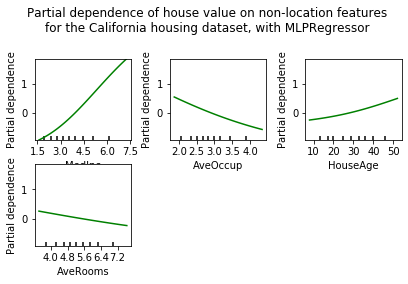

In [18]:
# Plot MLP Regressor
features = [0, 5, 1, 2]
plot_partial_dependence(est, X, features, feature_names=names, n_jobs=3, grid_resolution=50)
fig = plt.gcf()
fig.suptitle('Partial dependence of house value on non-location features\n'
            'for the California housing dataset, with MLPRegressor')
plt.subplots_adjust(top=0.8) # Fix Title overlap with graphs

In [19]:
# Train Gradient Boosting Regressor
est = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, loss='huber', random_state=1)
est.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

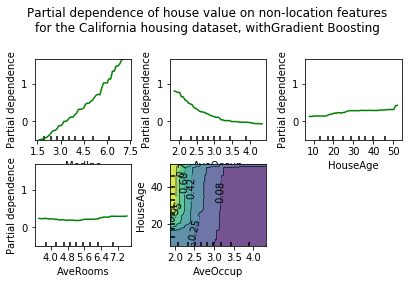

In [20]:
# Plot GDB Regressor
features = [0, 5, 1, 2, (5, 1)]
plot_partial_dependence(est, X, features, feature_names=names, n_jobs=3, grid_resolution=50)

fig=plt.gcf()
fig.suptitle('Partial dependence of house value on non-location features\n'
            'for the California housing dataset, withGradient Boosting')
plt.subplots_adjust(top=0.8)

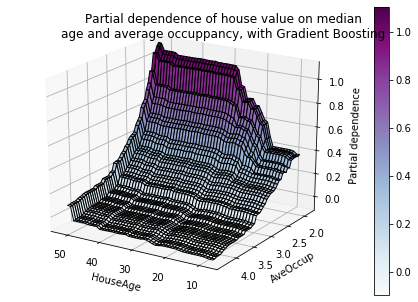

In [25]:
# 3d Plot via Partial Dependence
fig = plt.figure()

target_feature = (1,5)
pdp, axes = partial_dependence(est, X, target_feature, grid_resolution=50)

XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX,YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')

# Pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median\n'
            'age and average occuppancy, with Gradient Boosting')
plt.subplots_adjust(top=0.8)
plt.show()